In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import xgboost as xgb

In [ ]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('train.csv')
df_train.head()

,Id,F1,F6,F34,F35,F36,F37,F38,F39,F40,...,F26,F27,F28,F29,F30,F5,F31,F32,F33,spend
0,7927,10.757485,0.537126,5.0,0.997356,0.569606,clear,0.202911,0.602928,335.0,...,2.723535,4.0,-1.581429,0.213716,22.0,NaN,1.130016,0.648712,0.742649,246.73
1,2372,4.848618,0.423382,25.0,0.987104,0.612255,clear,0.883592,0.763840,103.0,...,0.305928,2.0,-1.803781,NaN,17.0,0.2985,0.218450,0.852411,-0.422875,733.07
2,8642,7.904951,0.878947,8.0,0.160811,0.062817,clear,0.366808,NaN,365.0,...,1.023905,1.0,0.739488,0.556315,20.0,0.2239,2.167962,0.418454,-1.037502,168.44
3,5832,6.614649,0.288525,107.0,0.582864,0.089124,cloudy/misty,0.196197,NaN,248.0,...,1.082970,3.0,-0.977825,0.450957,10.0,0.1642,0.054852,0.829671,-0.050694,578.87
4,7603,12.043528,0.336714,6.0,0.853552,0.842087,clear,0.114875,0.461383,322.0,...,0.460358,4.0,-0.053725,2.468859,9.0,0.1940,3.006568,0.279736,0.044226,505.32


In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,F1,F6,F34,F35,F36,F37,F38,F39,F40,...,F25,F26,F27,F28,F29,F30,F5,F31,F32,F33
0,3356,4.315330,0.624537,56.0,0.600559,0.202664,clear,0.079810,0.372578,144.0,...,0.344957,0.018483,2.0,1.051224,0.228748,17.0,0.1045,0.229362,0.627154,1.111864
1,7732,8.011094,0.280399,7.0,0.546460,0.251315,cloudy/misty,0.673545,0.888945,327.0,...,0.695317,1.010242,4.0,-0.247102,0.142666,18.0,0.5224,0.323818,0.889260,-0.962068
2,5219,7.745323,0.492092,38.0,0.181773,0.004323,clear,0.786447,0.120280,222.0,...,0.018754,1.299396,3.0,-1.454948,0.029840,8.0,0.1940,0.149635,0.186704,-0.420277
3,6813,2.007758,0.267575,121.0,0.977457,0.997046,clear,0.375918,0.313365,289.0,...,0.212749,3.108179,4.0,-1.292058,0.587499,10.0,0.2537,0.203142,0.069041,-1.300275
4,244,7.516640,0.459411,2.0,0.629487,0.194659,cloudy/misty,0.466810,0.502220,11.0,...,0.897974,0.891341,1.0,1.461539,0.360113,12.0,0.1045,1.108956,0.344412,0.966674


In [ ]:
print(df.dtypes)

Id         int64
F1       float64
F6       float64
F34      float64
F35      float64
F36      float64
F37       object
F38      float64
F39      float64
F40      float64
F41      float64
F42      float64
F7       float64
F8       float64
F9       float64
F10      float64
F11      float64
F2       float64
F12      float64
F13      float64
F14      float64
F15      float64
F4       float64
F16      float64
F17      float64
F18      float64
F19      float64
F3       float64
F20       object
F21      float64
F22      float64
F23      float64
F24      float64
F25      float64
F26      float64
F27      float64
F28      float64
F29      float64
F30      float64
F5       float64
F31      float64
F32      float64
F33      float64
spend    float64
dtype: object


In [ ]:
df_train.isnull().sum()

,0
Id,0
F1,13
F6,0
F34,774
F35,0
F36,0
F37,0
F38,0
F39,1032
F40,0


In [ ]:
numerical_cols = ['F34', 'F39', 'F8', 'F12', 'F21', 'F24', 'F29', 'F30', 'F5','F1','F42','F10','F2','F14','F3'] #
for col in numerical_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mean())


df_train.isnull().sum()

,0
Id,0
F1,0
F6,0
F34,0
F35,0
F36,0
F37,0
F38,0
F39,0
F40,0


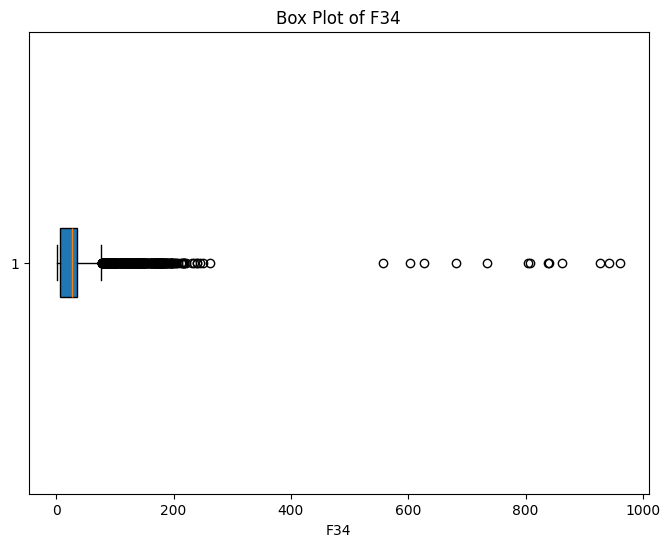

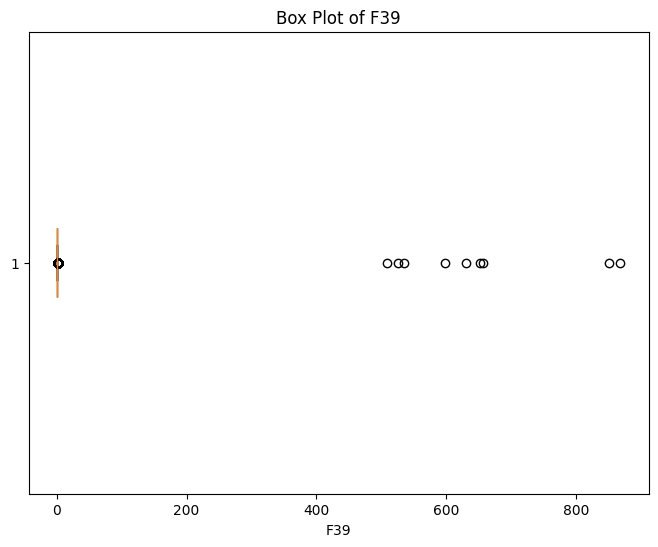

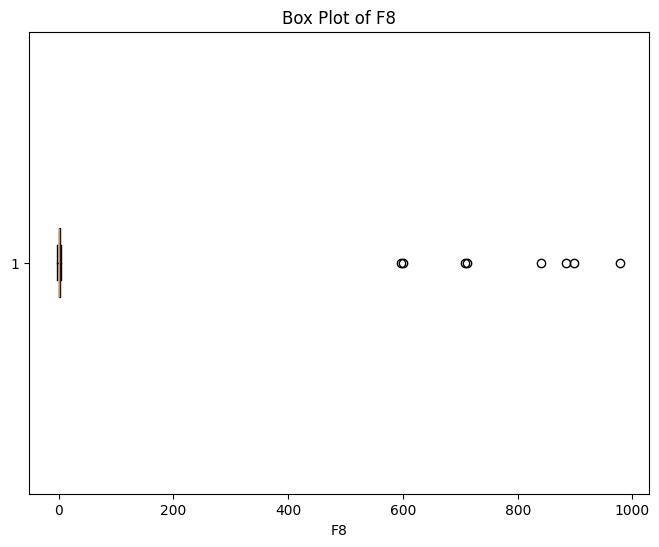

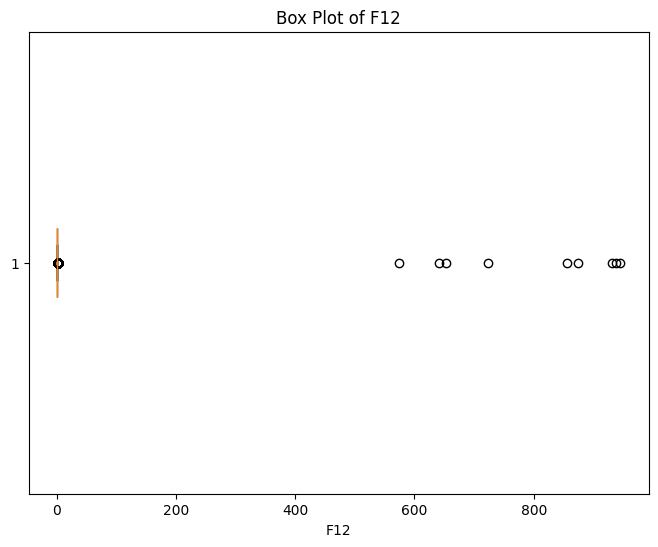

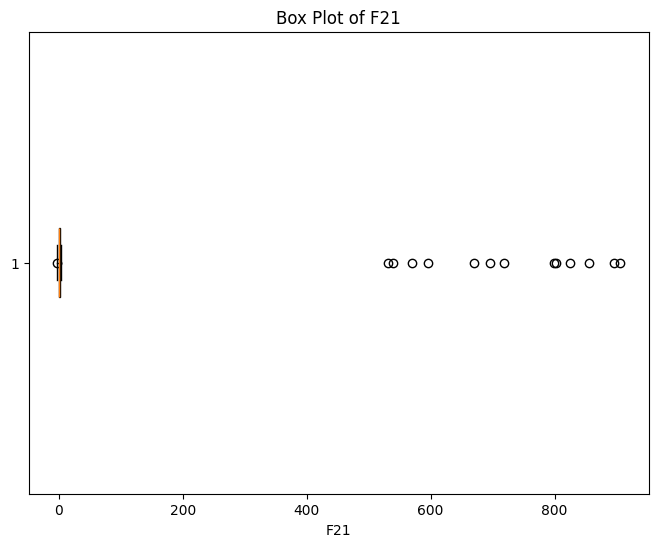

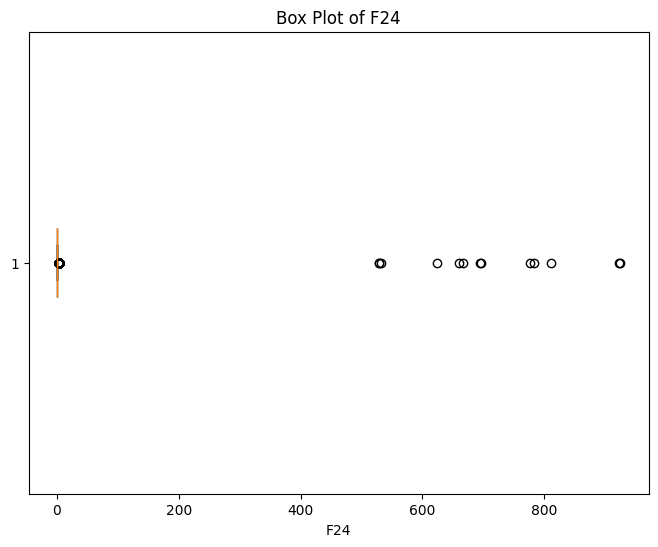

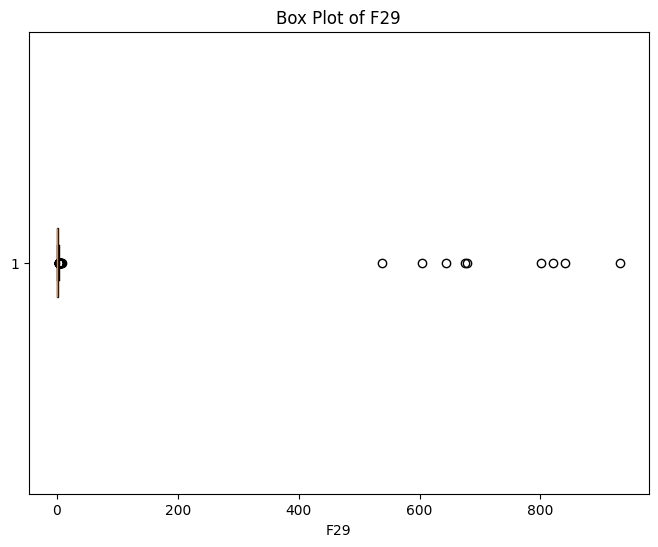

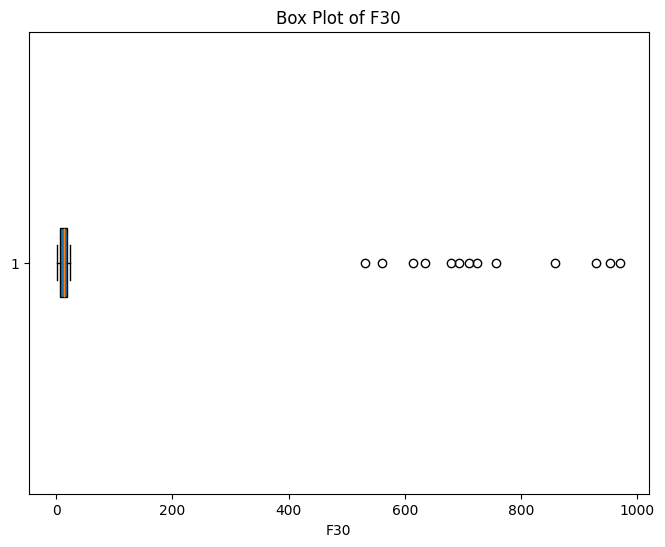

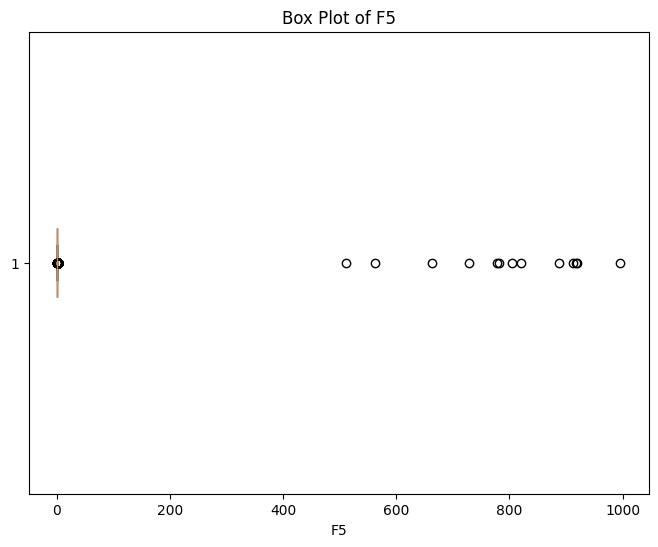

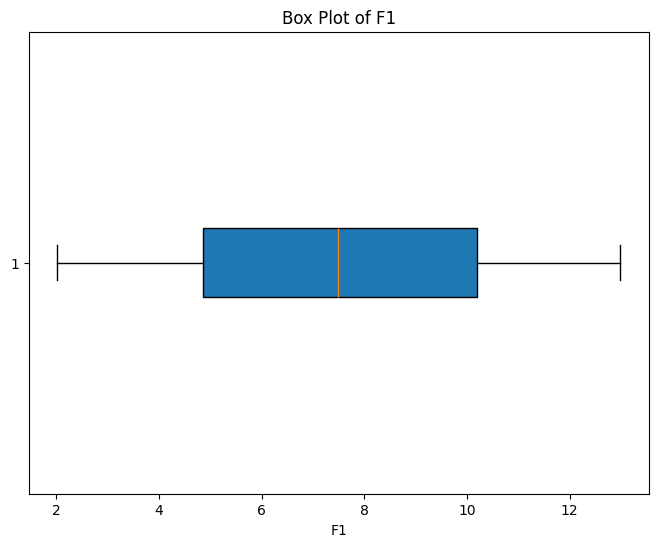

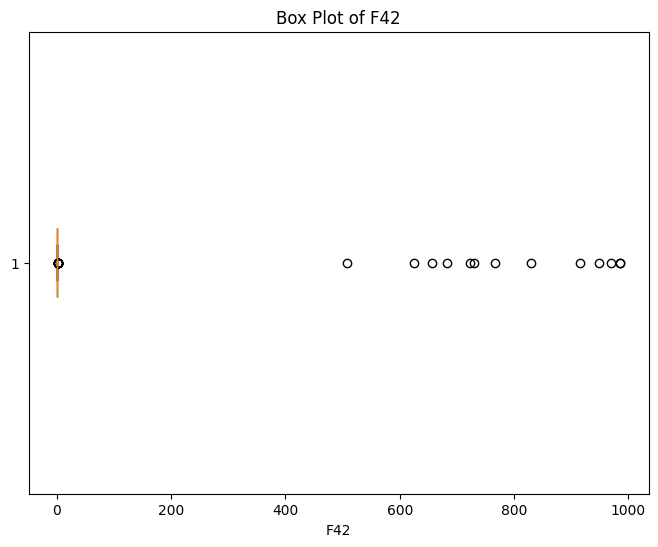

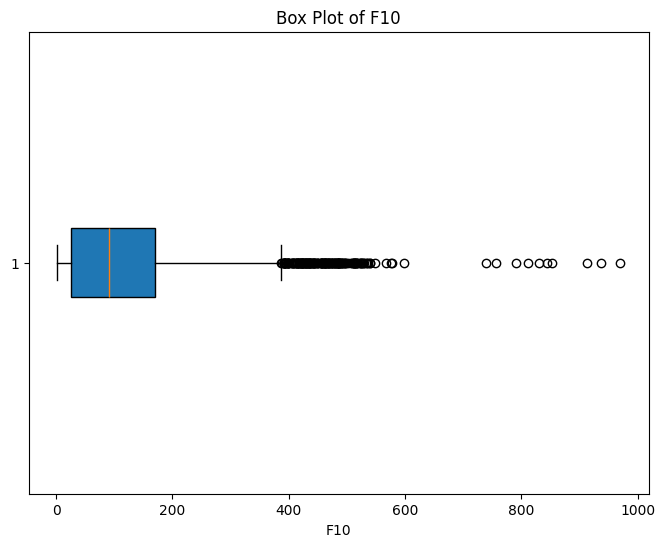

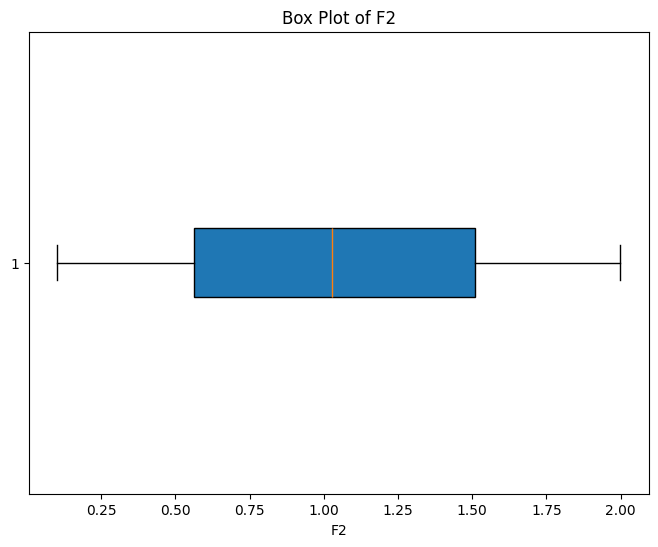

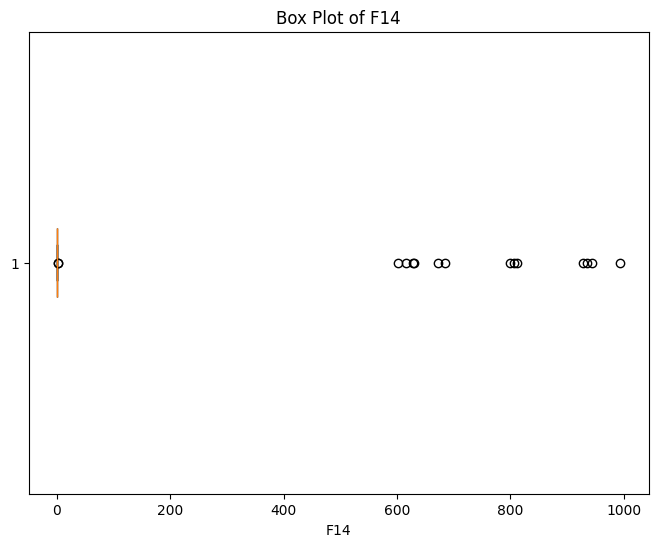

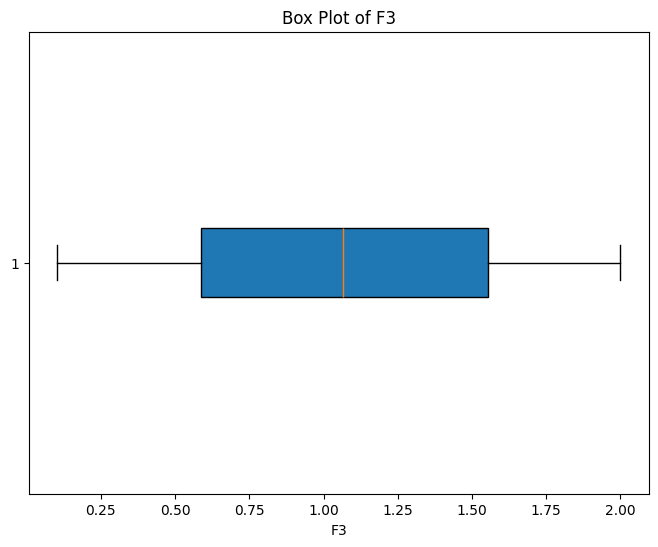

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.boxplot(df_train[col], vert=False, patch_artist=True)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

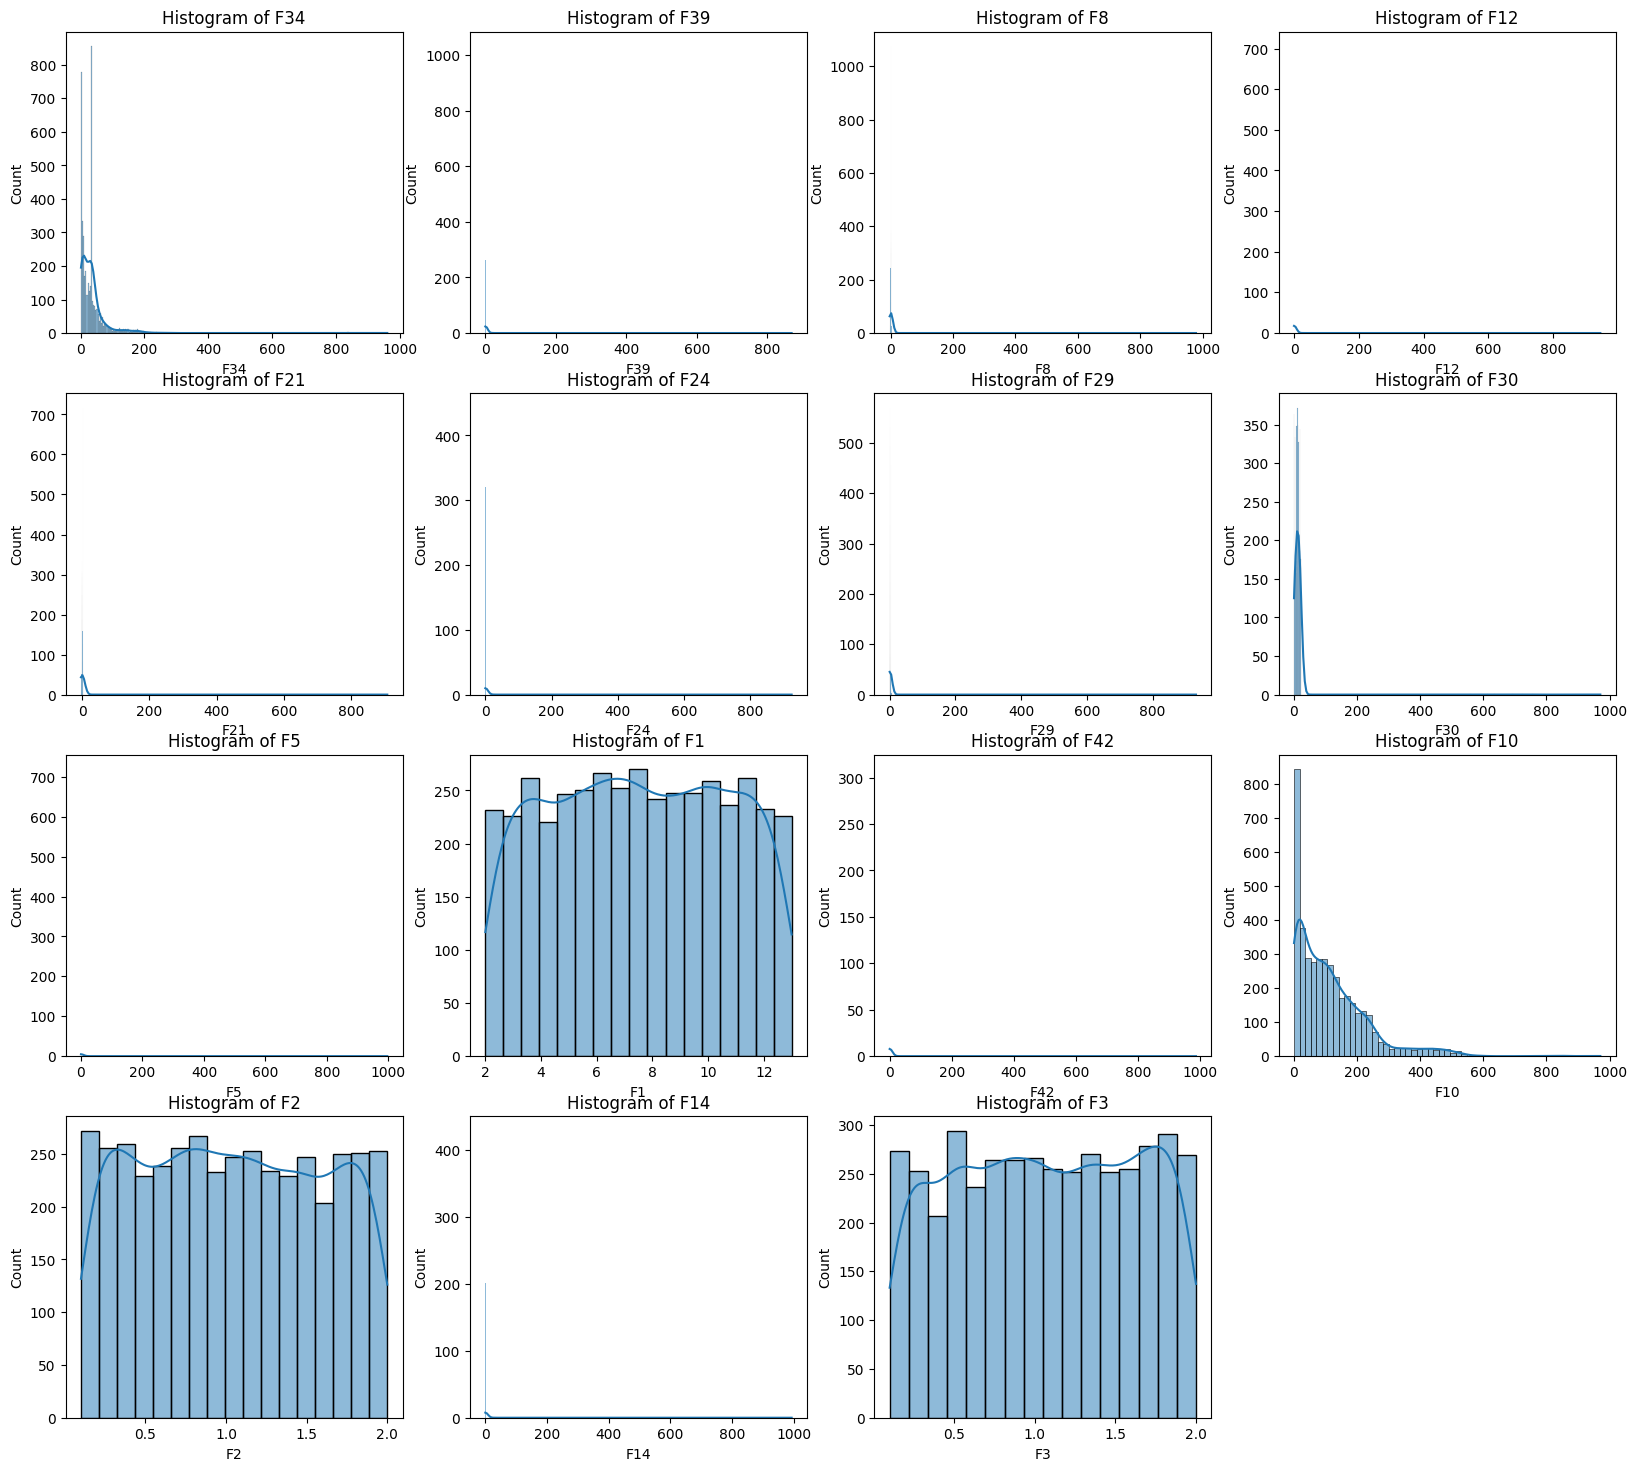

In [ ]:
#histograms
plt.figure(figsize=(20, 18))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt

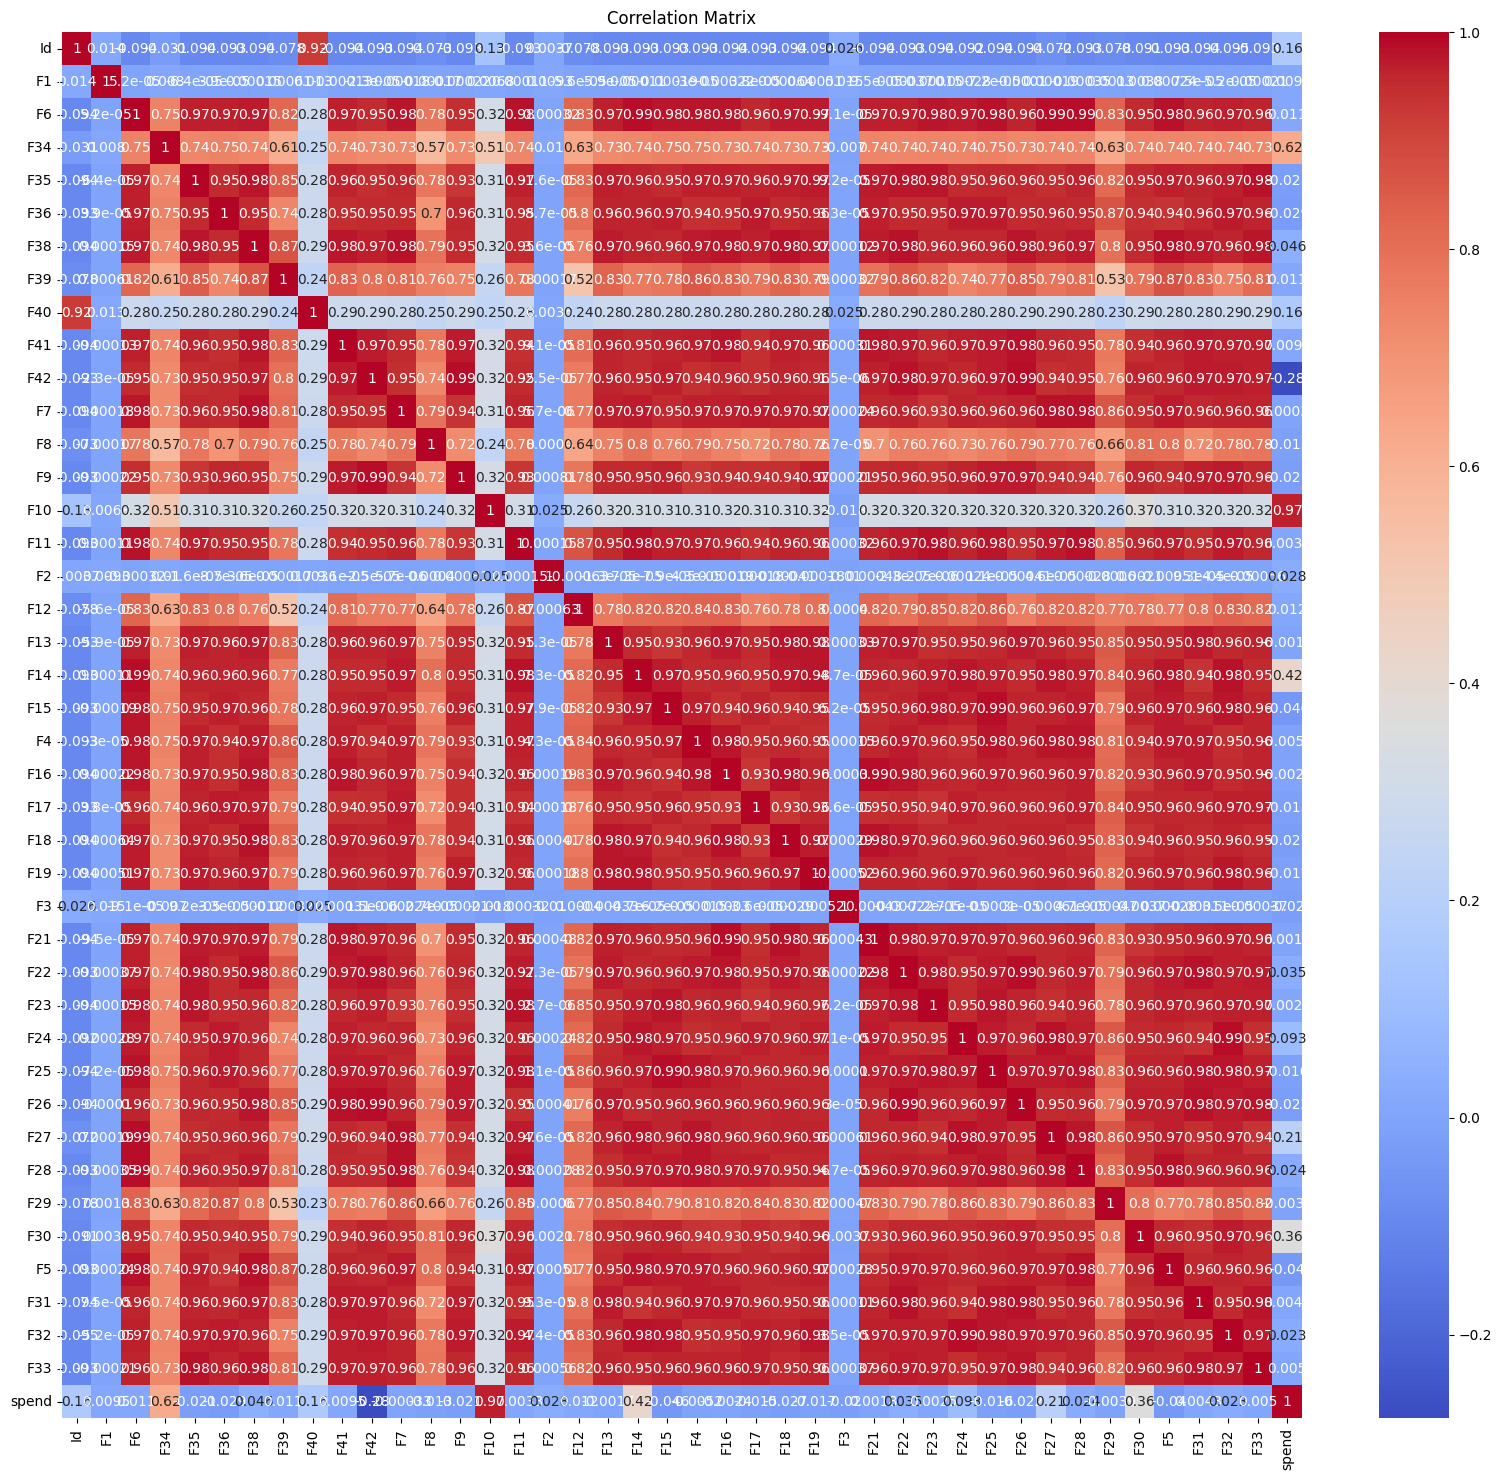

In [ ]:
  plt.figure(figsize=(20, 18))
corr = df_train.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
target_counts = df_train['spend'].value_counts()

print(target_counts)

target_percentage = target_counts / len(df_train) * 100
print(target_percentage)

spend
14.23      70
7.12       67
11.86      65
9.49       64
16.61      60
           ..
1010.64     1
903.88      1
1295.33     1
782.89      1
1098.42     1
Name: count, Length: 525, dtype: int64
spend
14.23      1.675042
7.12       1.603254
11.86      1.555396
9.49       1.531467
16.61      1.435750
             ...   
1010.64    0.023929
903.88     0.023929
1295.33    0.023929
782.89     0.023929
1098.42    0.023929
Name: count, Length: 525, dtype: float64


In [ ]:
print(df_train.info())
print(df_train.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4179 non-null   int64  
 1   F1      4179 non-null   float64
 2   F6      4179 non-null   float64
 3   F34     4179 non-null   float64
 4   F35     4179 non-null   float64
 5   F36     4179 non-null   float64
 6   F37     4179 non-null   object 
 7   F38     4179 non-null   float64
 8   F39     4179 non-null   float64
 9   F40     4179 non-null   float64
 10  F41     4179 non-null   float64
 11  F42     4179 non-null   float64
 12  F7      4179 non-null   float64
 13  F8      4179 non-null   float64
 14  F9      4179 non-null   float64
 15  F10     4179 non-null   float64
 16  F11     4179 non-null   float64
 17  F2      4179 non-null   float64
 18  F12     4179 non-null   float64
 19  F13     4179 non-null   float64
 20  F14     4179 non-null   float64
 21  F15     4179 non-null   float64
 22  

In [ ]:
X = df_train.drop('spend', axis=1)
y = df_train['spend']

numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])
X_scaled = pd.DataFrame(X_scaled, columns=numerical_cols, index=X.index)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])
feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=X.index)

X_preprocessed = pd.concat([X_scaled, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1258.7885542297745


In [ ]:
X = df_train.drop('spend', axis=1)
y = df_train['spend']

numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])
X_scaled = pd.DataFrame(X_scaled, columns=numerical_cols, index=X.index)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])
feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=X.index)

X_preprocessed = pd.concat([X_scaled, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=40)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1293.4755624649474


In [ ]:

numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])
X_scaled = pd.DataFrame(X_scaled, columns=numerical_cols, index=X.index)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])
feature_names = encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=X.index)

X_preprocessed = pd.concat([X_scaled, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=40)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1293.4755624649474


In [ ]:
y_pred_test = model.predict(X_test)
print("predicted_test")
y_pred_test

predicted_test


array([ 511.11      ,   94.683     ,  908.9858    ,   18.2939    ,
        319.7992    ,  265.2576    ,   19.5964    ,   41.2325    ,
          7.713     ,  468.9761    ,  154.348     ,  496.0685    ,
        886.5427    , 1348.3291    ,  389.1452    ,  420.3654    ,
        399.9868    ,   58.6701    ,    7.0719    ,  656.5373    ,
         50.5796    ,  672.1002    ,   83.2231    ,  205.2132    ,
        814.5396    ,    9.917     ,  434.0783    ,   35.4207    ,
        309.5035    ,  698.1972    ,  338.3985    ,  732.6212    ,
        399.9871    ,  184.9515    ,   46.3331    ,    7.12      ,
        387.3426    ,    7.6654    ,  110.7912    ,    7.0962    ,
        124.7864    ,  258.3785    ,  467.0306    ,  755.917     ,
         14.4437    ,  207.4663    ,  726.6422    ,  673.8559    ,
         10.4143    ,  338.446     ,   14.0667    ,   91.6927    ,
        270.6676    , 1375.304     ,  449.2859    ,  716.3222    ,
        539.8871    ,   47.5916    ,  414.0787    ,  359.513  

In [ ]:

numerical_cols_test = df_test.select_dtypes(include=['number']).columns
categorical_cols_test = df_test.select_dtypes(include=['object']).columns

X_scaled_test = scaler.transform(df_test[numerical_cols_test])
X_scaled_test = pd.DataFrame(X_scaled_test, columns=numerical_cols_test, index=df_test.index)

X_encoded_test = encoder.transform(df_test[categorical_cols_test])
X_encoded_test = pd.DataFrame(X_encoded_test, columns=feature_names, index=df_test.index)

X_test_final = pd.concat([X_scaled_test, X_encoded_test], axis=1)



y_pred = model.predict(X_test_final)


results_df = pd.DataFrame({'Id': df_test['Id'], 'spend': y_pred})
results_df

,Id,spend
0,3356,1311.1302
1,7732,355.1010
2,5219,944.5230
3,6813,835.9164
4,244,139.2845
...,...,...
207,4690,752.0975
208,1119,100.4483
209,6795,1000.0138
210,5149,638.3174


In [ ]:


results_df.to_csv('submission.csv', index=False)